## Data visualization on life expectancy using pyexcel and pyexcel-chart


Data source: [Life Expectancy, The World Bank, World Development Indicators](
http://data.worldbank.org/indicator/SP.DYN.LE00.IN)

First, let us read the data on life expectancy at birth around all countries.

In [38]:
import pyexcel as p
from IPython.display import HTML, display
sheet = p.get_sheet(url='https://github.com/pyexcel/pyexcel-chart/raw/master/docs/source/API_SP.DYN.LE00.IN_DS2_en_csv_v2.csv')
sheet.top_left()

"﻿""Data Source""",World Development Indicators,,,
,,,,
Last Updated Date,2017-01-03,,,
,,,,
Country Name,Country Code,Indicator Name,Indicator Code,1960


The first four rows contain meta data and are not needed. Let us remove them

In [39]:
del sheet.row[:4]
sheet.top_left()

Country Name,Country Code,Indicator Name,Indicator Code,1960
Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.5693658536586
Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,
Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.328512195122
Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.9848292682927


Now the column 'Country Code', 'Indicator Name', and 'Indicator Code' are not interesting. Let us remove them

In [40]:
del sheet.column[1:4]
sheet.top_left()

Country Name,1960,1961,1962,1963
Aruba,65.5693658536586,65.9880243902439,66.3655365853659,66.7139756097561
Andorra,,,,
Afghanistan,32.328512195122,32.7774390243902,33.2199024390244,33.6578780487805
Angola,32.9848292682927,33.3862195121951,33.7875853658537,34.1884634146342


In order to draw, x labels should be in one column and data series should be presented like columns. Hence,
let us transpose the table

In [41]:
sheet.transpose()
sheet.top_left()

Country Name,Aruba,Andorra,Afghanistan,Angola
1960,65.5693658536586,,32.328512195122,32.9848292682927
1961,65.9880243902439,,32.7774390243902,33.3862195121951
1962,66.3655365853659,,33.2199024390244,33.7875853658537
1963,66.7139756097561,,33.6578780487805,34.1884634146342


Now let's select BRICS countries for viewing:

In [42]:
sheet.name_columns_by_row(0)
sheet.column.select(['Country Name', 'Brazil', 'Russian Federation', 'India', 'China', 'South Africa'])
sheet.top_left()

Country Name,Brazil,China,India,Russian Federation
1960,54.2055,43.354,41.172,66.0553
1961,54.7187,43.6733,41.7905,66.597
1962,55.2357,44.3983,42.4174,67.0214
1963,55.7514,45.5789,43.0527,67.3399
1964,56.263,47.1896,43.6984,67.5665


We got a perfect data table. Let us draw it to a svg file:

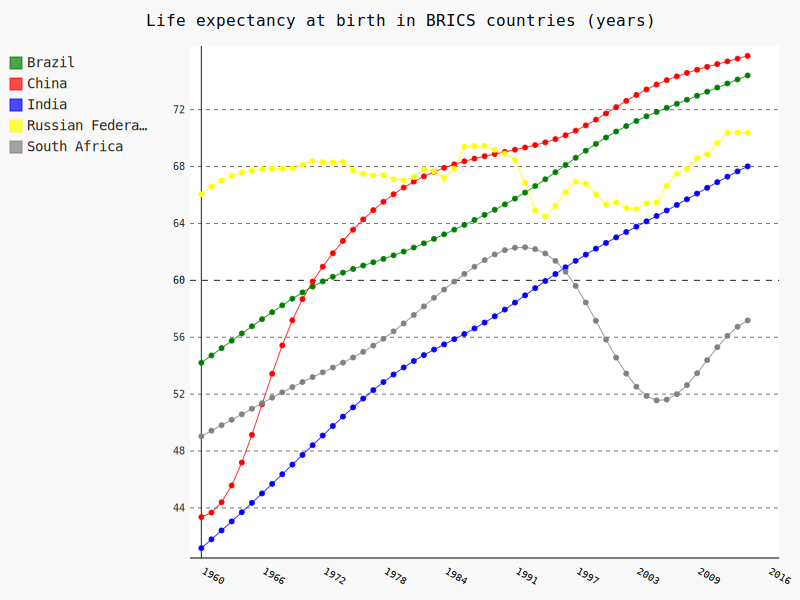

In [43]:
from pygal.style import Style
sheet.plot(chart_type='line', 
           title='Life expectancy at birth in BRICS countries (years)',
           x_labels_major_count=10,
           x_label_rotation=30,
           style=Style(colors=["green", "red", "blue", "yellow", "grey"]),
           show_minor_x_labels=False)